# Predictive Mainatinance - EDA on Telemetry Dataset (2 of 4)

### Environmnet Setup:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

### Telemetry

The first data source is the telemetry time-series data which consists of voltage, rotation, pressure, and vibration measurements collected from 100 machines in real time averaged over every hour collected during the year 2015.

#### Explanations on the data schema:

- datetime:  the day when that row of data was collected for that machine (datetime64)
- machineID: machine identifier starting from 1 with increments of +1 (int64)
- volt:      machine voltage values (float64)
- rotate:    machine rotatation values (float64)
- pressure:  machine pressure values (float64)
- vibration: machine vibration values (float64)

In [2]:
telemetry = pd.read_csv('data/telemetry.csv')
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [3]:
telemetry.tail()

,datetime,machineID,volt,rotate,pressure,vibration
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259
876099,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245


### Stats on the Telemetry (telemetry.csv) Dataset

In [4]:
telemetry.shape # print the dataframe (num rows, num cols)

(876100, 6)

In [5]:
telemetry.info() # print information on this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
datetime     876100 non-null datetime64[ns]
machineID    876100 non-null int64
volt         876100 non-null float64
rotate       876100 non-null float64
pressure     876100 non-null float64
vibration    876100 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 40.1 MB


In [6]:
telemetry.describe() # print some basic statistical details on this dataframe

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


### Inspect For Outliers

There is notably a significant diffrence between 75th percentile and maximum value of the columns vibration, pressure, rotate and volt. This suggests there exists outliers in these columns

Values outside the 3 times IQR above than the third quater or 3 times IQR below the third quater are considered outliers. These values can be clearly seen in the boxplot visualizations below

In [7]:
telemetry_modified = telemetry.drop(['datetime', 'machineID'], axis=1)  # drop datetime and machineIDs

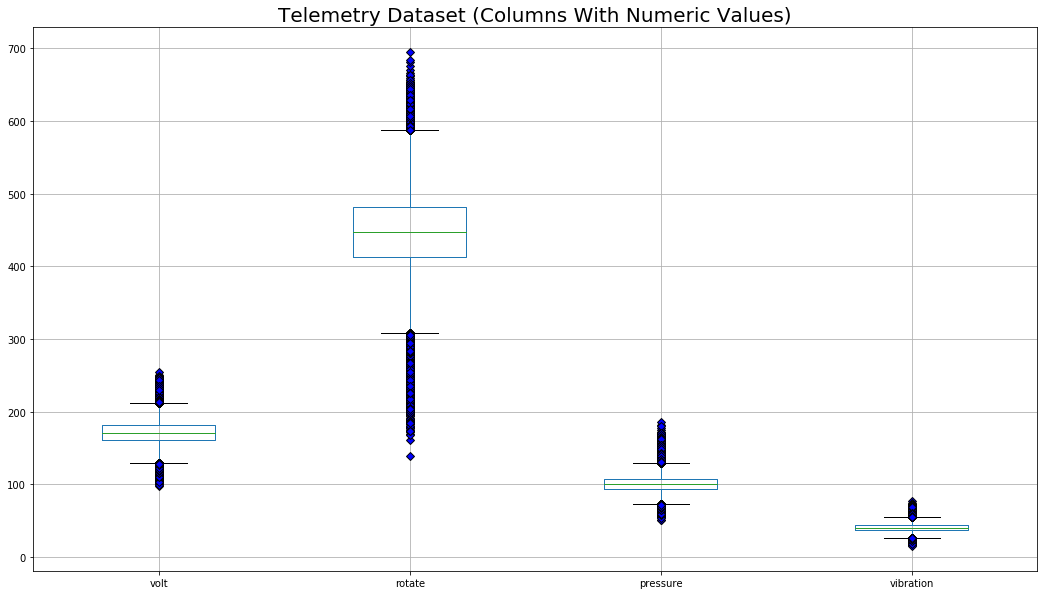

In [8]:
# using matplotlib
plt.figure(figsize=(18,10))
telemetry_modified.boxplot(flierprops=dict(markerfacecolor='b', marker='D'))
plt.title("Telemetry Dataset (Columns With Numeric Values)",  fontsize=20)
plt.show()

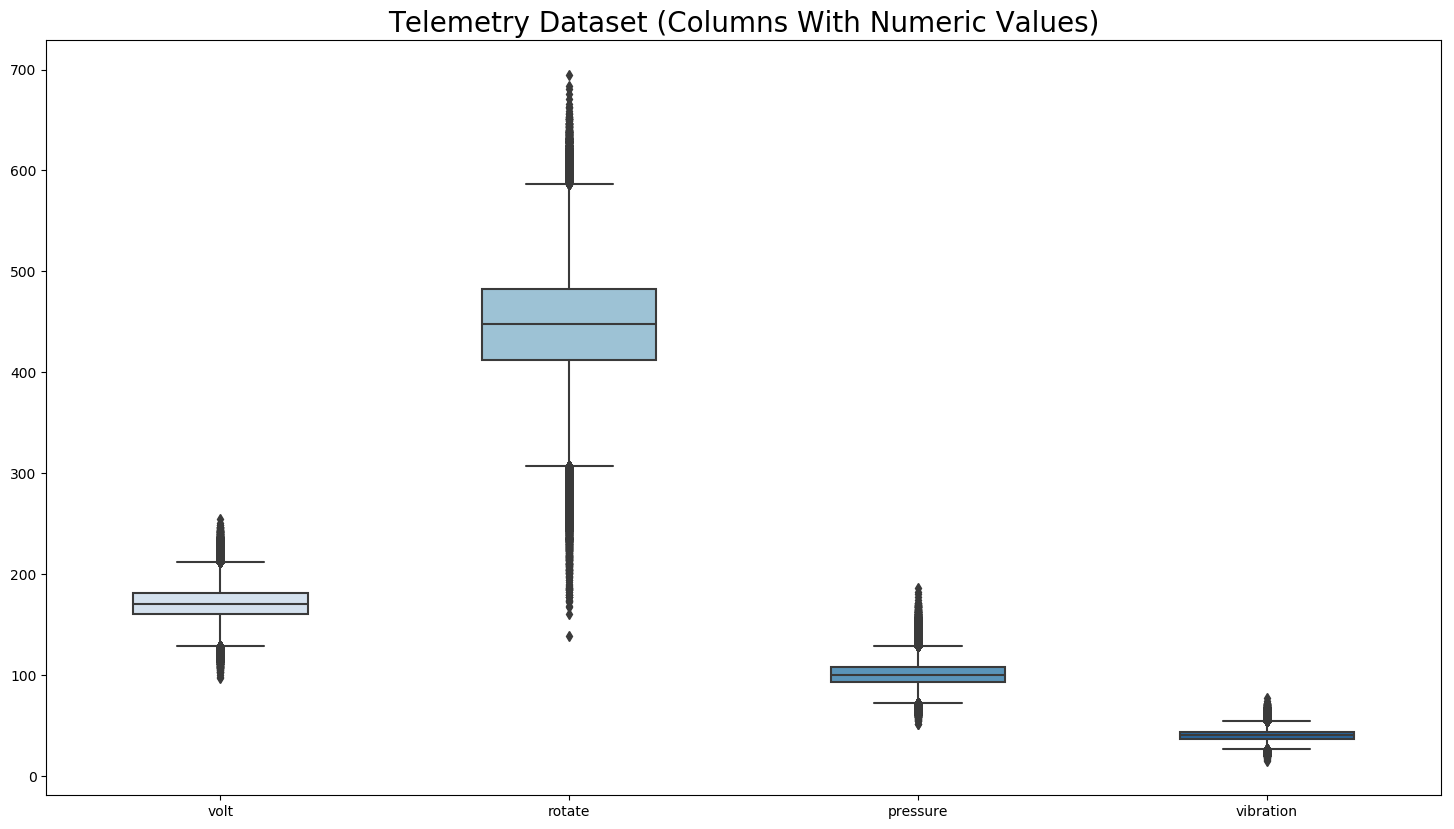

In [9]:
# using seasborn -- alternate visualization
plt.figure(figsize=(18, 10), dpi=100)
plt.title("Telemetry Dataset (Columns With Numeric Values)", fontsize=20)
sns.set()
sns.boxplot(data=telemetry_modified, palette="Blues", width=0.5)
plt.show()

As suggested above all the quantities volt, rotate, pressure and vibration have outliers.

### Inspect The Distribution of columns Rotate, Volt, Pressure, Vibration

In all the columns the median and mean are fairly equal suggesting that the distributions of data in these columns are symmetric.

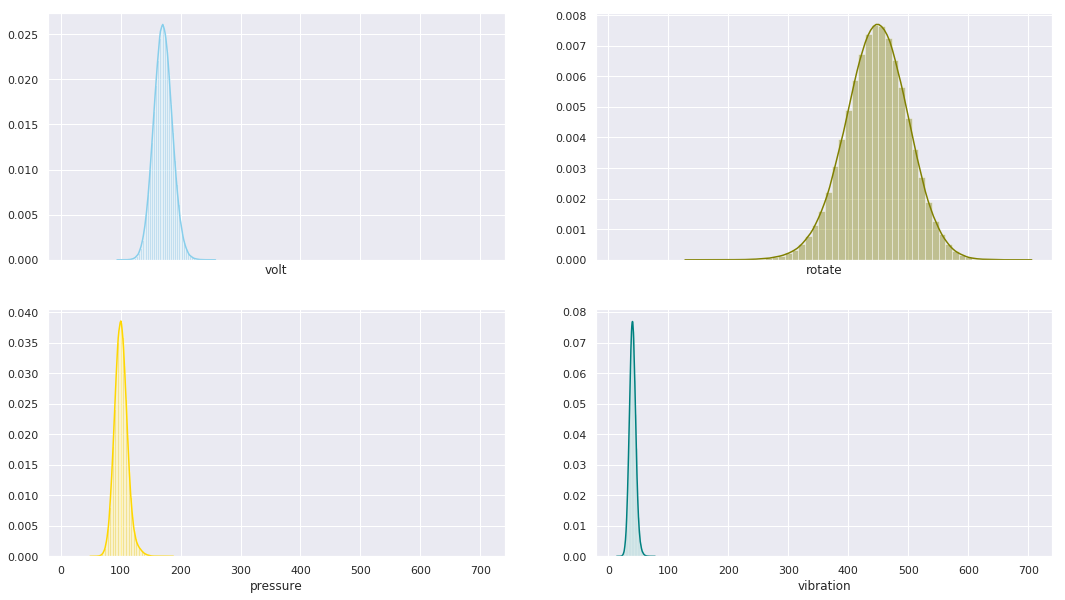

In [11]:
_, axes = plt.subplots(2, 2, figsize=(18, 10), sharex=True)
sns.distplot( telemetry["volt"] ,      color="skyblue", ax=axes[0, 0])
sns.distplot( telemetry["rotate"] ,    color="olive",   ax=axes[0, 1])
sns.distplot( telemetry["pressure"] ,  color="gold",    ax=axes[1, 0])
sns.distplot( telemetry["vibration"] , color="teal",    ax=axes[1, 1])
plt.show()

As suggested above all the quantities seem symmetrically distributed. None Skewed.

Check composition of columns (fully unique or not)

In [12]:
telemetry['machineID'].unique().size # There are 100 unique machineIDs

100

In [13]:
telemetry['machineID'].size # There are 876100 machineID records

876100

In [14]:
def get_uniques(col):
    return pd.unique(col).size == col.size

telemetry.apply(get_uniques, axis=0)

datetime     False
machineID    False
volt          True
rotate        True
pressure      True
vibration     True
dtype: bool

### Inspect Columns With Missing Values

In [15]:
pd.DataFrame({'total_missing': telemetry.isnull().sum(), 
              'perc_missing': (telemetry.isnull().sum()/telemetry.shape[0])*100})

,total_missing,perc_missing
datetime,0,0.0
machineID,0,0.0
volt,0,0.0
rotate,0,0.0
pressure,0,0.0
vibration,0,0.0


In [16]:
 # alternative calculation - using lambdas
pd.DataFrame({'total_missing': telemetry.apply(lambda x: sum(x.isnull()), axis=0), 
              'perc_missing': (telemetry.isnull().sum()/telemetry.shape[0])*100})

,total_missing,perc_missing
datetime,0,0.0
machineID,0,0.0
volt,0,0.0
rotate,0,0.0
pressure,0,0.0
vibration,0,0.0


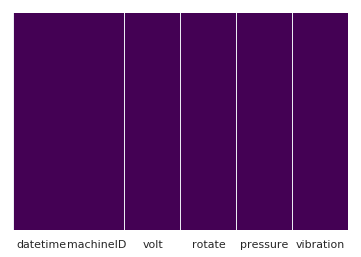

In [17]:
sns.heatmap(telemetry.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

The heatmap shows that there are no missing values. The missing values would have otherwise been represented by a diffrent color (shade of purple).

### Inspect Correlation Between Two Values

In [18]:
telemetry_feb = telemetry.loc[(telemetry['machineID'] == 10) &
                              (telemetry['datetime'] > pd.to_datetime('2015-02-01')) &
                              (telemetry['datetime'] < pd.to_datetime('2015-03-01'))]

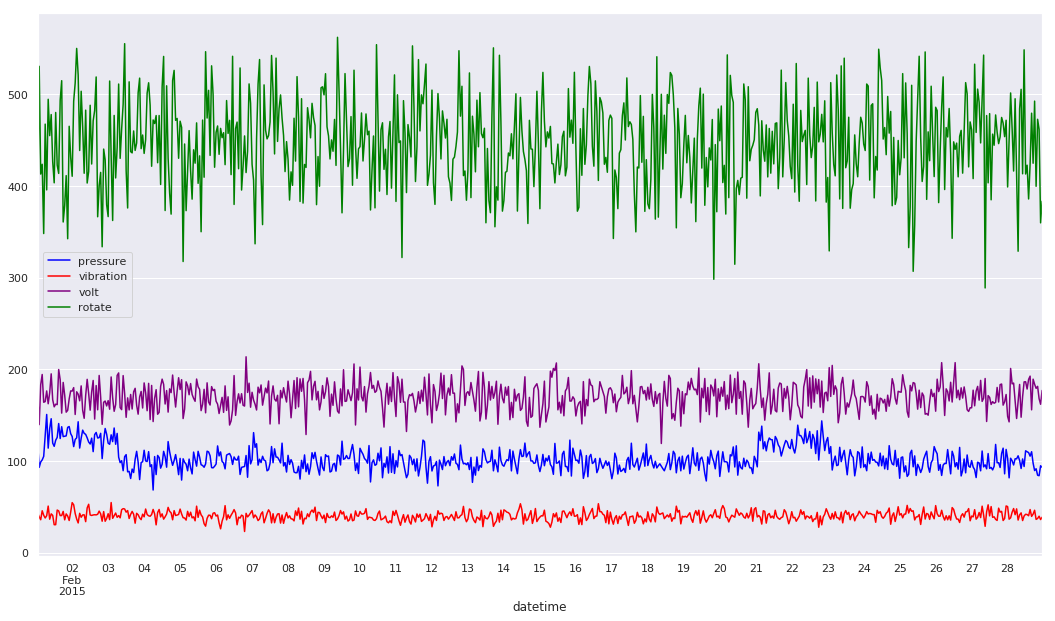

In [19]:
fig = plt.gcf()
ax  = plt.gca()

telemetry_feb.plot(kind='line', x='datetime', y='pressure',  color='blue', ax=ax)
telemetry_feb.plot(kind='line', x='datetime', y='vibration', color='red', ax=ax)
telemetry_feb.plot(kind='line', x='datetime', y='volt',      color='purple', ax=ax)
telemetry_feb.plot(kind='line', x='datetime', y='rotate',    color='green', ax=ax)

fig.set_size_inches(18,10)
plt.show()

A look at the line plots of the quantities suggents losely that they are corelated, the peaks and the bottoms seem to correspond. To view this more clearly we can look at all the quantities in the month of february at a much shorter duration (1 day) from 2015-02-11 to 2015-02-12.

In [20]:
telemetry_feb_sub = telemetry.loc[(telemetry['machineID'] == 10) &
                                  (telemetry['datetime'] > pd.to_datetime('2015-02-11')) &
                                  (telemetry['datetime'] < pd.to_datetime('2015-02-12'))]

We can go ahead and plot a correlation plot for all the quantities, volt, rotate, pressure, vibration to revel the linear correlation that exists here. 

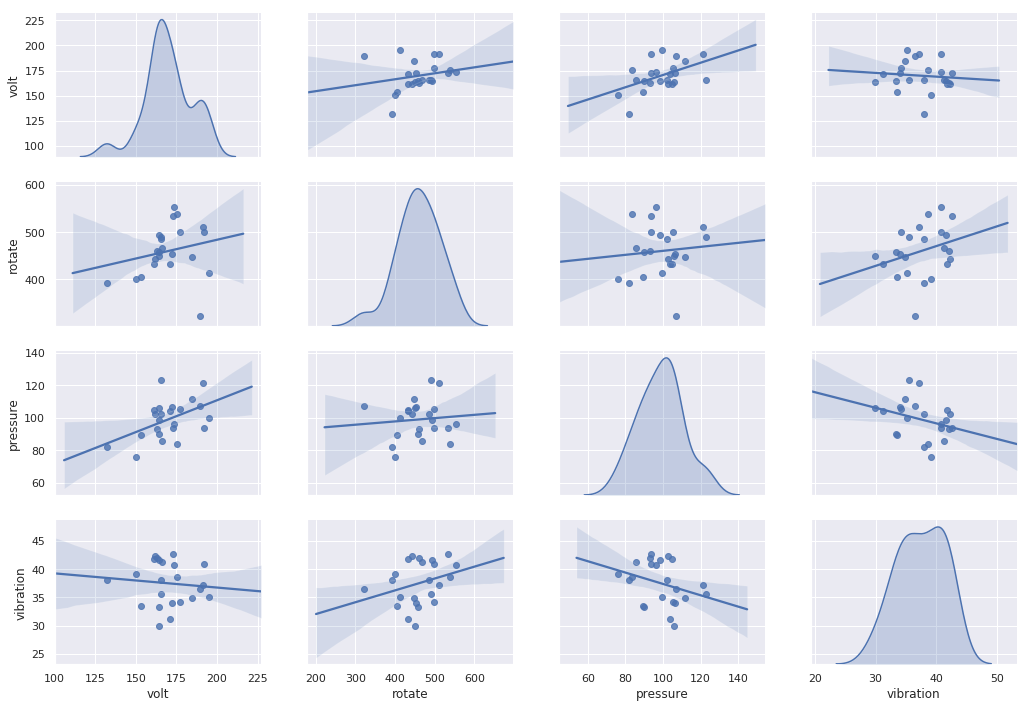

In [21]:
pair_plt = sns.pairplot(telemetry_feb_sub, 
                        vars=["volt", "rotate", "pressure", "vibration"], 
                        kind="reg", 
                        diag_kind = "kde")
pair_plt.fig.set_figheight(10)
pair_plt.fig.set_figwidth(15)

Plotting a correlation heatmap for this quantities.

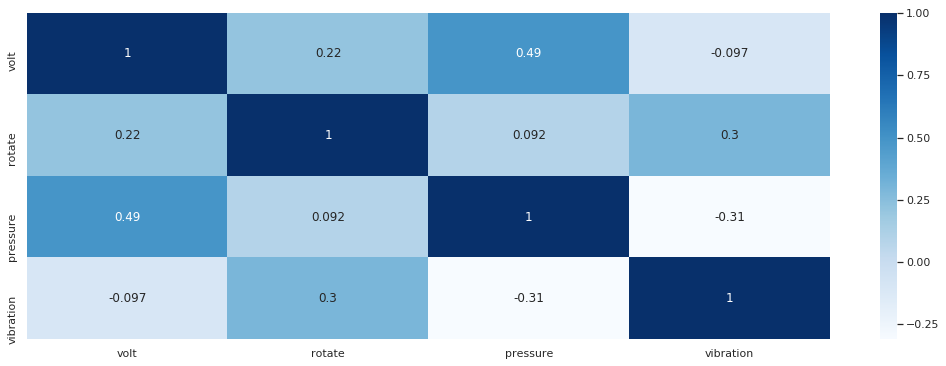

In [22]:
plt.figure(figsize = (18,6))
sns.heatmap(telemetry_feb_sub.drop(['datetime', 'machineID'], axis=1).corr(), annot=True, cmap='Blues')
plt.show()

There is correlation, both negative and positive as can been seen in the above heatmap.

To view this more clearly we can look at two quantities; pressure and volt in the month of february (1 day) from 2015-02-11 to 2015-02-12. The correlation can be seen here by the way both pressure and volt peak and plunge in unison

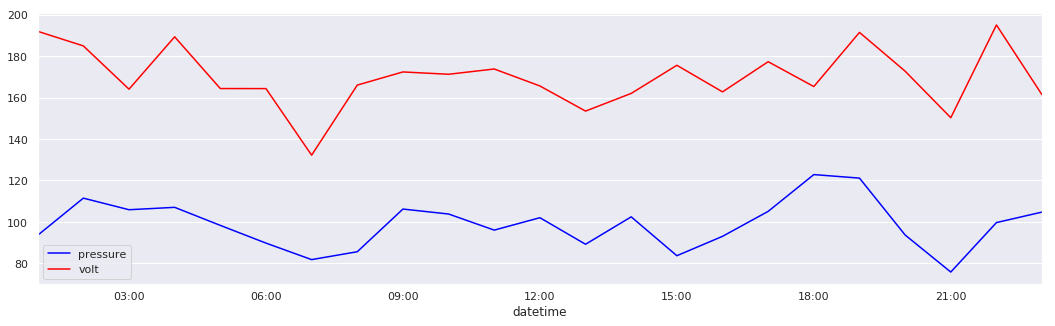

In [23]:
fig = plt.gcf()
ax  = plt.gca()

telemetry_feb_sub.plot(kind='line', x='datetime', y='pressure', color='blue', ax=ax)
telemetry_feb_sub.plot(kind='line', x='datetime', y='volt',     color='red',  ax=ax)

fig.set_size_inches(18,5)
plt.show()

A bit easier to see, but we can extend this inspection to using a pairplot with linear regression below

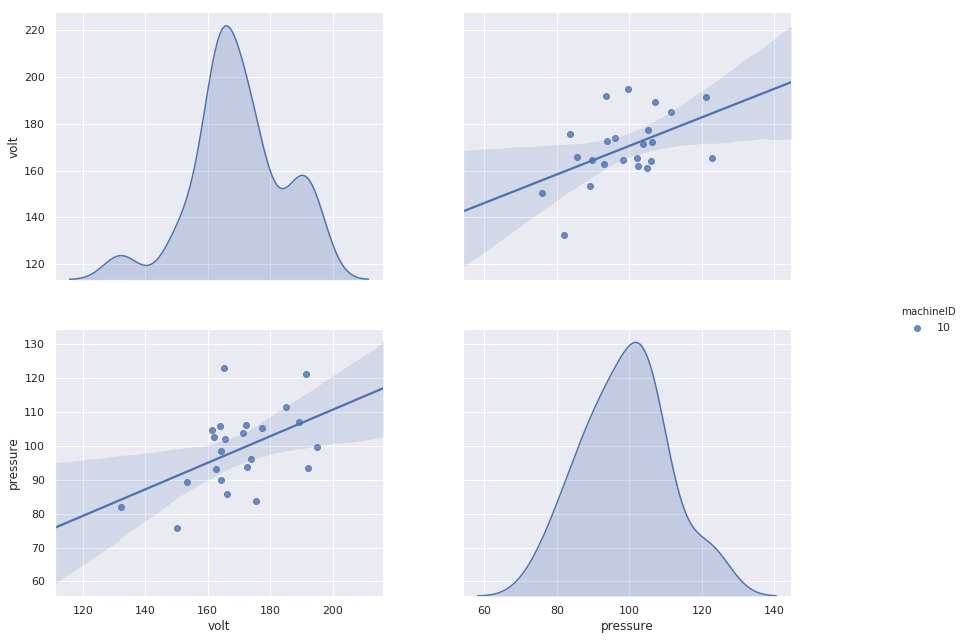

In [25]:
pair_plt = sns.pairplot(telemetry_feb_sub, 
                        vars=["volt","pressure"], 
                        hue="machineID", 
                        kind="reg", 
                        diag_kind="kde")
pair_plt.fig.set_figheight(10)
pair_plt.fig.set_figwidth(15)

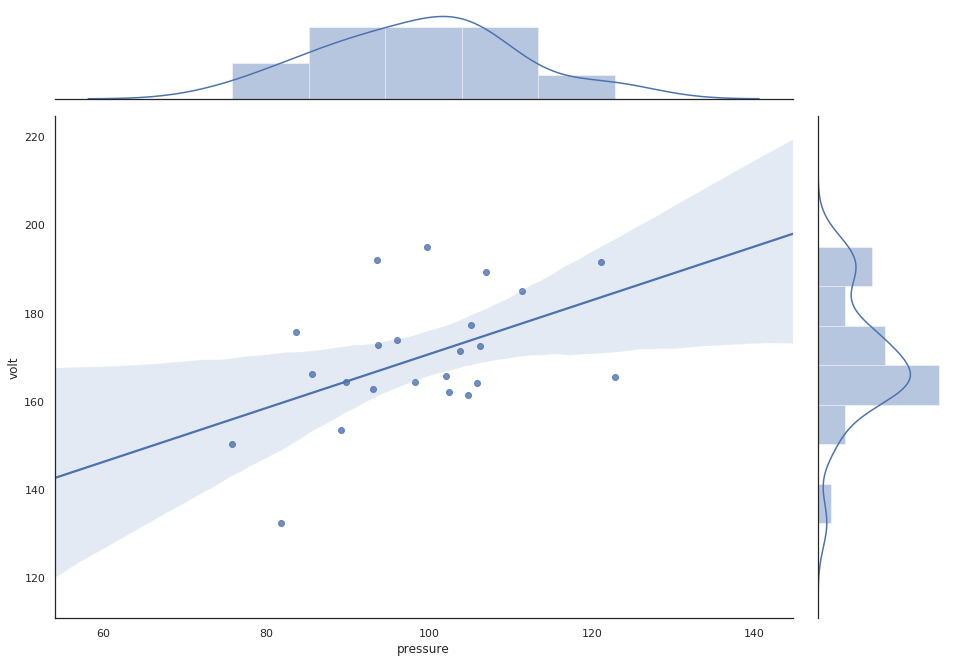

In [26]:
with sns.axes_style('white'):
    pair_plt = sns.jointplot("pressure", 
                              "volt", 
                              data=telemetry_feb_sub.drop(['datetime', 
                                                           'machineID', 
                                                           'rotate', 
                                                           'vibration'], axis=1), 
                              kind="reg", 
                              color="b")

    pair_plt.fig.set_figheight(10)
    pair_plt.fig.set_figwidth(15)

To be more presice we can plot the annotated correlation on a heat map to see how these quantities correlate.

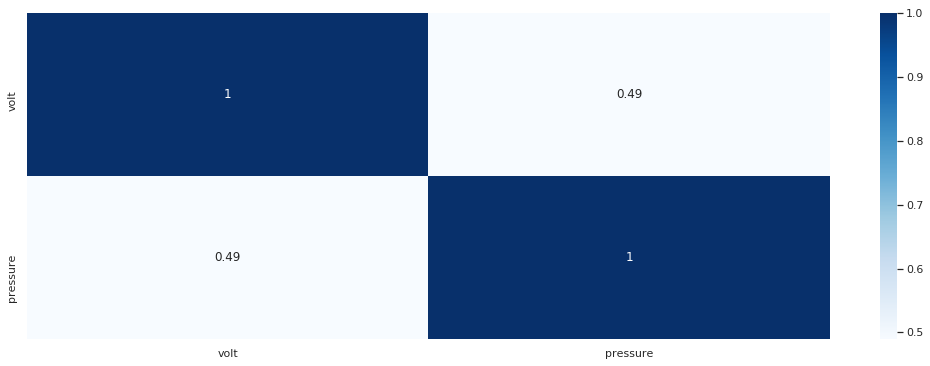

In [27]:
plt.figure(figsize = (18,6))
sns.heatmap(telemetry_feb_sub.drop(['machineID', 
                                    'rotate', 
                                    'vibration'], axis=1).corr(), annot=True, cmap='Blues')
plt.show()

There exits a positive correlation between the two quantities pressure and volt.